<center><h1> Tweets Disaster or Not?<h1>

# Competition Description

 - Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies). But, it’s not always clear whether a person’s words are actually announcing a disaster.

#### Source: https://www.kaggle.com/c/nlp-getting-started/overview

# Objective:

 - Given the keyword, location and text (tweet), model should predict if the tweet is announcing a disaster (1) or not (0).

# Trained the model with

 - __Machine Learning Alogrithm: Naive Bayes__
 - __Deep Learning: LSTM (Long Short Term Memory)__

<center><h1>Machine Learning<h1>
<center><h5>Naive Bayes<h5>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [0]:
df = pd.read_csv('/content/drive/My Drive/Tweets Disaster or not/nlp-getting-started/train.csv')

test = pd.read_csv('/content/drive/My Drive/Tweets Disaster or not/nlp-getting-started/test.csv')

submission = pd.read_csv('/content/drive/My Drive/Tweets Disaster or not/nlp-getting-started/sample_submission.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Value counts of target variable

In [0]:
print('value counts of target\n')
df.target.value_counts()

value counts of target



0    4342
1    3271
Name: target, dtype: int64

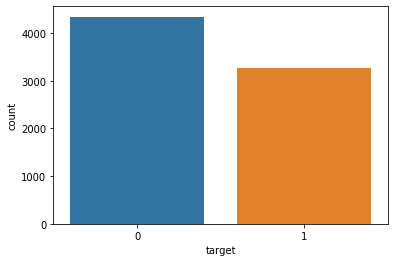

In [0]:
sns.countplot(df.target)
plt.show()

# Data set is well balanced

In [0]:
col = df.columns

for i in range(len(col)-1):
    if df[col[i]].isnull().sum() != 0:
        c = df[col[i]].isnull().sum()
        print('\n{} column has {} null values'.format(col[i], c))


keyword column has 61 null values

location column has 2533 null values


In [0]:
print('\nPercentage of null values in keyword:', round((df.keyword.isnull().sum() / df.shape[0]) * 100, 3))
print('\nPercentage of null values in location:', round((df.location.isnull().sum() / df.shape[0]) * 100, 3))


Percentage of null values in keyword: 0.801

Percentage of null values in location: 33.272


In [0]:
print('Number of unique values in keyword:', df.keyword.nunique(), '\n')
print('Number of unique values in location:', df.location.nunique(), '\n')

Number of unique values in keyword: 221 

Number of unique values in location: 3341 



In [0]:
print('\n-> Preprocessed text data:\n')

for i in range(0, df.shape[0], 300):
    print('\n{}'.format(i)+':', df['text'][i])



-> Preprocessed text data:


0: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all

300: Shadow boxing the apocalypse

600: #BreakingNews http://t.co/gAN14PW9TG FedEx no longer willing to transport research specimens of potential bioterÛ_ http://t.co/5n4hUsewLy

900: Damn bloody hot

1200: kou is like [CASH REGISTER] [BUILDINGS BURNING]

1500: catastrophic-fallen-angel: reveillertm: macabrelolita: I was supposed to write Û÷amino acidsÛª and I nearly... http://t.co/dIoBzGHFju

1800: ??One night and we're gonna come and crash the party
Weren't invited but we're feelin' soÛ_ https://t.co/9hKXxBB82O

2100: I liked a @YouTube video from @jeromekem http://t.co/Nq89drydbU DJ Hazard - Death Sport

2400: Sound judgement by MPC - premature rises could derail recovery #Business http://t.co/fvLgU1naYr

2700: Ignition Knock (Detonation) Sensor-Senso BECK/ARNLEY 158-1017 http://t.co/ryoByQJFCE http://t.co/LW9O2kDk18

3000: Dust Storm 'en route' from Alice Springs to Uluru htt

In [0]:
# Importing libraries

import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from tqdm import tqdm

# Create an instance for SnowballStemmer
ss = SnowballStemmer('english')

In [0]:
# Defining a function to convert short words like couldn't to full word could not
def short_form(full_form):
    
    full_form = full_form.lower()      
    
    full_form = re.sub(r"won't", "will not", full_form)
    full_form = re.sub(r"wouldn't", "would not", full_form)
    full_form = re.sub(r"can't", "can not", full_form)
    full_form = re.sub(r"don't", "don not", full_form)
    full_form = re.sub(r"shouldn't", "should not", full_form)
    full_form = re.sub(r"couldn't", "could not", full_form)
    full_form = re.sub(r"\'re", " are", full_form)
    full_form = re.sub(r"\'s", " is", full_form)
    full_form = re.sub(r"\'d", " would", full_form)
    full_form = re.sub(r"\'ll", " will", full_form)
    full_form = re.sub(r"\'ve", " have", full_form)
    full_form = re.sub(r"\'m", " am", full_form)
  
    return full_form

# To remove URL
def url(ur):
    ur = re.sub(r"http\S+", '', ur)
    return ur

# Defining a function to remove punctuations, numbers, stopwords and get stem of words
def punc(pun):
    pun = re.sub('[^a-zA-Z]', ' ', pun)
    pun = pun.lower()
    pun = pun.split()
    pun = [ss.stem(sw) for sw in pun if sw not in stopwords.words('english')]
    pun = ' '.join(pun)
    return pun

In [7]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Test data

In [0]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
col = test.columns

for i in range(len(col)-1):
    if test[col[i]].isnull().sum() != 0:
        c = test[col[i]].isnull().sum()
        print('\n{} column has {} null values'.format(col[i], c))


keyword column has 26 null values

location column has 1105 null values


In [0]:
print('\nPercentage of null values in keyword:', round((test.keyword.isnull().sum() / test.shape[0]) * 100, 3))
print('\nPercentage of null values in location:', round((test.location.isnull().sum() / test.shape[0]) * 100, 3))


Percentage of null values in keyword: 0.797

Percentage of null values in location: 33.865


In [0]:
print('Number of unique values in keyword:', test.keyword.nunique(), '\n')
print('Number of unique values in location:', test.location.nunique(), '\n')

Number of unique values in keyword: 221 

Number of unique values in location: 1602 



# Working on Train data

In [0]:
import copy
dfe = copy.deepcopy(df)

In [0]:
# Keyword column
# Filling na with previous data point
# Before that we will fill null values with string 'null' for better detection

dfe['keyword'].fillna('nul', inplace = True)

for i in range(32):
    if dfe['keyword'][i] != 'nul':
        dfe['keyword'][0] = dfe['keyword'][i]


# Now replacing 'null' string with previous values.
for i in range(dfe.shape[0]):
    if dfe['keyword'][i] == 'nul':
        dfe['keyword'][i] = dfe['keyword'][i-1]

In [0]:
# Location column
# Filling na with previous data point
# Before that we will fill null values with string 'null' for better detection

dfe['location'].fillna('nul', inplace = True)

for i in range(32):
    if dfe['location'][i] != 'nul':
        dfe['location'][0] = dfe['location'][i]


# Now replacing 'null' string with previous values.
for i in range(dfe.shape[0]):
    if dfe['location'][i] == 'nul':
        dfe['location'][i] = dfe['location'][i-1]

In [12]:
from tqdm import tqdm

loc_train_clean = []

for i, s in enumerate(tqdm(dfe['location'].values)):
    
    u = url(s)
    sf = short_form(u)
    pu = punc(sf)
    loc_train_clean.append(pu)

100%|██████████| 7613/7613 [00:01<00:00, 4016.09it/s]


In [13]:
from tqdm import tqdm

text_train_clean = []

for i, s in enumerate(tqdm(dfe['text'].values)):
    
    u = url(s)
    sf = short_form(u)
    pu = punc(sf)
    text_train_clean.append(pu)

100%|██████████| 7613/7613 [00:11<00:00, 646.30it/s]


In [14]:
print('\n-> Preprocessed text data:\n')

dfe['location'] = loc_train_clean

dfe['text'] = text_train_clean


-> Preprocessed text data:



In [0]:
dfc = copy.deepcopy(dfe)

# dfc.to_csv('train_clean.csv', index = False)

# Working on Test data

In [0]:
teste = copy.deepcopy(test)

In [0]:
# Keyword column
# Filling na with previous data point
# Before that we will fill null values with string 'null' for better detection

teste['keyword'].fillna('nul', inplace = True)

for i in range(20):
    if teste['keyword'][i] != 'nul':
        teste['keyword'][0] = teste['keyword'][i]


# Now replacing 'null' string with previous values.
for i in range(teste.shape[0]):
    if teste['keyword'][i] == 'nul':
        teste['keyword'][i] = teste['keyword'][i-1]

In [0]:
# Location column
# Filling na with previous data point
# Before that we will fill null values with string 'null' for better detection

teste['location'].fillna('nul', inplace = True)

for i in range(32):
    if teste['location'][i] != 'nul':
        teste['location'][0] = teste['location'][i]


# Now replacing 'null' string with previous values.
for i in range(test.shape[0]):
    if teste['location'][i] == 'nul':
        teste['location'][i] = teste['location'][i-1]

In [20]:
from tqdm import tqdm

loc_test_clean = []

for i, s in enumerate(tqdm(teste['location'].values)):
    
    u = url(s)
    sf = short_form(u)
    pu = punc(sf)
    loc_test_clean.append(pu)

100%|██████████| 3263/3263 [00:00<00:00, 3845.86it/s]


In [21]:
from tqdm import tqdm

text_test_clean = []

for i, s in enumerate(tqdm(teste['text'].values)):
    
    u = url(s)
    sf = short_form(u)
    pu = punc(sf)
    text_test_clean.append(pu)

100%|██████████| 3263/3263 [00:05<00:00, 644.50it/s]


In [22]:
print('\n-> Preprocessed text data:\n')

teste['location'] = loc_test_clean

teste['text'] = text_test_clean


-> Preprocessed text data:



In [0]:
testc = copy.deepcopy(teste)

# testc.to_csv('test_clean.csv', index = False)

# Feature Engineering

# Combining keyword, location and text columns

In [0]:
dfe['key_loc_text'] = dfe['keyword'] + dfe['location'] + dfe['text']

teste['key_loc_text'] = teste['keyword'] + teste['location'] + teste['text']

# Label Encoding on keyword column (categorical)

In [0]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

dfe['keyword'] = lb.fit_transform(dfe['keyword'])

teste['keyword'] = lb.transform(teste['keyword'])

# BoW on combined text feature

In [0]:
# Import CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance
# Bi-gram
cv_klt = CountVectorizer(ngram_range = (1, 2))

# Fit and transform train data
tr_klt_b = cv_klt.fit_transform(dfe['key_loc_text'])

# Transform test data
te_klt_b = cv_klt.transform(teste['key_loc_text'])

# Feature Scaling

In [0]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
tr_klt_n = normalize(tr_klt_b)

# Normalize test data
te_klt_n = normalize(te_klt_b)

# BoW on location column

In [0]:
# Import CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance
# Bi-gram
cv_l = CountVectorizer(ngram_range = (1, 2))

# Fit and transform train data
tr_l_b = cv_l.fit_transform(dfe['location'])

# Transform test data
te_l_b = cv_l.transform(teste['location'])

# Feature scaling

In [0]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
tr_l_n = normalize(tr_l_b)

# Normalize test data
te_l_n = normalize(te_l_b)

# BoW on text column

In [0]:
# Import CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance
# Bi-gram
cv_t = CountVectorizer(ngram_range = (1, 2))

# Fit and transform train data
tr_t_b = cv_t.fit_transform(dfe['text'])

# Transform test data
te_t_b = cv_t.transform(teste['text'])

# Feature scaling

In [0]:
# Import normalize library
from sklearn.preprocessing import normalize

# Normalize train data
tr_t_n = normalize(tr_t_b)

# Normalize test data
te_t_n = normalize(te_t_b)

## Stacking all featurized data

In [0]:
# Reshaping so as to hstack
tr_key = dfe['keyword'].values.reshape(-1, 1)
te_key = teste['keyword'].values.reshape(-1, 1)

# Horizontal stacking
from scipy.sparse import hstack
x_tr_e = hstack((tr_key, tr_klt_n, tr_l_n, tr_t_n))
x_te_e = hstack((te_key, te_klt_n, te_l_n, te_t_n))

In [0]:
# Assigning target variable to y
y = dfe['target']

# Algorithm: Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

nbe = MultinomialNB()

param = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 10000]}


clf_nbe = GridSearchCV(estimator = nbe, param_grid = param, scoring = 'f1', cv = 4)

clf_nbe.fit(x_tr_e, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [36]:
print('\n-> Best score:', clf_nbe.best_score_, '\n')
print('*'*50, '\n')

print('\n-> Best estimators:', clf_nbe.best_estimator_)


-> Best score: 0.6558787007352466 

************************************************** 


-> Best estimators: MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)


# Predicting test data

In [0]:
# Predicting test data
nbe_pre = clf_nbe.predict(x_te_e)

# Getting a copy of submission file
sub_nb_e = copy.deepcopy(submission)

# Mapping all predicted data with submission file
sub_nb_e['target'] = nbe_pre

# Saving final submission file
sub_nb_e.to_csv('Naive_Bayes.csv', index = False)

<center><h1>Deep Learning<h1>
<center><h5>LSTM (Long Short Term Memory)<h5>

# Uploading Glove vector to notebook

In [38]:
!wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7" --header="Cookie: _ga=GA1.2.1427375684.1564236587; _gid=GA1.2.1756276653.1578506617; _gat=1" --header="Connection: keep-alive" "http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip" -O "glove.6B.zip" -c

--2020-01-11 05:18:03--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  1.99MB/s    in 6m 30s  

2020-01-11 05:24:34 (2.11 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [39]:
!pip install pyunpack

  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=0b2325a3b7431c9ec358eb3f19025ec7b3bbefce42f67a600c976a8d6ec74715
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
from pyunpack import Archive
Archive('glove.6B.zip').extractall('/content/')

In [0]:
# https://nlp.stanford.edu/projects/glove/

# Loading the glove file

In [42]:
glove_dic = {}              # Stores the glove words and corresponding values

with open('/content/glove.6B.300d.txt') as f:

    for line in f:
        line_split = line.split()
        words = line_split[0]
        vec = np.asarray(line_split[1:], dtype = 'float32')
        glove_dic[words] = vec

print("glove_dic has {} vector words".format(len(glove_dic)))


glove_dic has 400000 vector words


In [43]:
import itertools

#item = dict(list(glove_dic.items())[0:1])
item = dict(itertools.islice(glove_dic.items(), 1))
print("\nKey word is", item.keys())
print("Length of vector corresponding to key {} is {}".format(item.keys(), len(item.values())))

print("Vector for the key {}".format(item.keys()), '\n\n')

print(item.values())


Key word is dict_keys(['the'])
Length of vector corresponding to key dict_keys(['the']) is 1
Vector for the key dict_keys(['the']) 


dict_values([array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
        2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
       -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
        2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
       -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
       -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
        9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
       -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
        1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
        2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
        1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
        2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  

# Tokenize the words from the training set

In [0]:
vocab_size = 100000
seq_len = 500
emb_dim = 300

In [45]:
from keras.preprocessing.text import Tokenizer

# Initializing Tokenizer
t = Tokenizer(num_words = vocab_size)

#Fitting on train set

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer
from numpy import zeros

def token(train_col, test_col, vocab_size, emb_dim):

    t = Tokenizer(num_words = vocab_size)

    # fitting on train columns set
    t.fit_on_texts(train_col)

    # text sequence
    tr_token = t.texts_to_sequences(train_col)
    te_token = t.texts_to_sequences(test_col)

    # Getting weight matrix
    word_count = min(vocab_size, len(t.word_index) + 1)

    emb_matrix = zeros((word_count, emb_dim))
    
    for word, i in t.word_index.items():
        emb_vec = glove_dic.get(word)
        if emb_vec is not None:
            emb_matrix[i] = emb_vec

    print("Number for unique words in train data:", len(t.word_index) + 1)
    print("Shape of weight matrix:", emb_matrix.shape)
    print("Length of word_index", len(t.word_index))

    return tr_token, te_token, emb_matrix, len(t.word_index)

# Padding sequence

In [0]:
from keras.preprocessing.sequence import pad_sequences

def pad_seq(tr_token, te_token):

    tr_pad = pad_sequences(tr_token, maxlen = seq_len, padding = 'post', truncating = 'post')
    te_pad = pad_sequences(te_token, maxlen = seq_len, padding = 'post', truncating = 'post')

    print("Shape of padded train:", tr_pad.shape)
    print("Shape of padded test:", te_pad.shape)

    return tr_pad, te_pad


In [0]:
#dfe['key_loc_text'] = dfe['keyword'] + dfe['location'] + dfe['text']

#teste['key_loc_text'] = teste['keyword'] + teste['location'] + teste['text']

# Calling token function to tokenzie and get weight matrix

# Combined feature column

In [49]:
tr_token_e, te_token_e, emb_matrix_e, fe_ind_len = token(dfe['key_loc_text'], teste['key_loc_text'], vocab_size, emb_dim) 

Number for unique words in train data: 21593
Shape of weight matrix: (21593, 300)
Length of word_index 21592


# Text column

In [50]:
tr_token_text, te_token_text, emb_matrix_text, text_ind_len = token(dfe['text'], teste['text'], vocab_size, emb_dim) 

Number for unique words in train data: 13115
Shape of weight matrix: (13115, 300)
Length of word_index 13114


# Location column 

In [51]:
tr_token_loc, te_token_loc, emb_matrix_loc, loc_ind_len = token(dfe['location'], teste['location'], vocab_size, emb_dim) 

Number for unique words in train data: 2905
Shape of weight matrix: (2905, 300)
Length of word_index 2904


# Calling padding function

# Tokens for combine feature

In [52]:
tr_pad_e, te_pad_e = pad_seq(tr_token_e, te_token_e) 

Shape of padded train: (7613, 500)
Shape of padded test: (3263, 500)


# Tokens for text column

In [53]:
tr_pad_text, te_pad_text = pad_seq(tr_token_text, te_token_text) 

Shape of padded train: (7613, 500)
Shape of padded test: (3263, 500)


# Tokens for location column

In [54]:
tr_pad_loc, te_pad_loc = pad_seq(tr_token_loc, te_token_loc) 

Shape of padded train: (7613, 500)
Shape of padded test: (3263, 500)


# Embedding layers

In [0]:
from keras.layers import Embedding, Dense, Flatten, Input, Dropout, BatchNormalization, concatenate, LSTM, Bidirectional

# Embedding layer for combined feature

In [0]:
import warnings
warnings.filterwarnings('ignore')

input_size = min(vocab_size, fe_ind_len + 1)

# Input layer
e_lay = Input(shape = (seq_len,), name = 'FE_Layer')

# Embedding layer
e_emb = Embedding(input_dim = input_size, output_dim = emb_dim, input_length = seq_len, weights = [emb_matrix_e],
                     trainable = False, name = 'FE_Embedding_Layer') (e_lay)

# LSTM layer
e_lstm = LSTM(128, return_sequences = True, dropout = 0.3) (e_emb)
# e_lstm = Bidirectional(LSTM(128, return_sequences = True, dropout = 0.3))(e_emb)

# Flatten layer
e_flat = Flatten()(e_lstm)

# Embedding layer for text feature

In [0]:
import warnings
warnings.filterwarnings('ignore')

input_size = min(vocab_size, text_ind_len + 1)

# Input layer
text_lay = Input(shape = (seq_len,), name = 'Text_Layer')

# Embedding layer
text_emb = Embedding(input_dim = input_size, output_dim = emb_dim, input_length = seq_len, weights = [emb_matrix_text],
                     trainable = False, name = 'Text_Embedding_Layer') (text_lay)

# LSTM layer
text_lstm = LSTM(128, return_sequences = True, dropout = 0.3) (text_emb)
# text_lstm = Bidirectional(LSTM(128, return_sequences = True, dropout = 0.3)) (text_emb)

# Flatten layer
text_flat = Flatten()(text_lstm)

# Embedding layer for location feature

In [0]:
import warnings
warnings.filterwarnings('ignore')

input_size = min(vocab_size, loc_ind_len + 1)

# Input layer
loc_lay = Input(shape = (seq_len,), name = 'Location_Layer')

# Embedding layer
loc_emb = Embedding(input_dim = input_size, output_dim = emb_dim, input_length = seq_len, weights = [emb_matrix_loc],
                     trainable = False, name = 'Location_Embedding_Layer') (loc_lay)

# LSTM layer
loc_lstm = LSTM(128, return_sequences = True, dropout = 0.3) (loc_emb)
# loc_lstm = Bidirectional(LSTM(128, return_sequences = True, dropout = 0.3)) (loc_emb)

# Flatten layer
loc_flat = Flatten()(loc_lstm)

# Embedding layer for keyword feature

In [0]:
# Unique values
tr_key_uni = dfe['keyword'].nunique()
tr_key_emb_size = int(np.ceil((tr_key_uni) / 2))

# Input layer
tr_key_inp = Input(shape = (1, ), name = 'Keyword_Layer_1')

# Embedding layer
tr_key_emb = Embedding(input_dim = tr_key_uni, output_dim = tr_key_emb_size,
                       trainable = True, name = 'Keyword_Embedding_1')(tr_key_inp)

# Flatten
tr_key_flat = Flatten()(tr_key_emb)

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

tr_key_encode = le.fit_transform(dfe['keyword'])
te_key_encode = le.transform(teste['keyword'])

# Getting all padded and encoded data into a list

In [0]:
tr_pad = [tr_pad_e, tr_pad_text, tr_pad_loc, tr_key_encode]

te_pad = [te_pad_e, te_pad_text, te_pad_loc, te_key_encode]

# Keras model:
 - Activation - 'relu'
 - Output activation - 'sigmoid'.
 - Dropout - 0.3
 - kernel_regularizer - regularizers.l2(0.01)

# Concatenate all flattend layers

In [0]:
con_lay = concatenate([e_flat, text_flat, loc_flat, tr_key_flat])

In [0]:
from keras.models import Model
from keras import regularizers, initializers

# Layer 1
m = Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(con_lay)
m = Dropout(0.3)(m)

# Layer 2
m = Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
m = Dropout(0.3)(m)

# Layer 3
m = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
m = Dropout(0.3)(m)

# Layer 4
m = Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
m = Dropout(0.3)(m)

# Output layer
output = Dense(2, activation = 'sigmoid', name= 'model_output')(m)

# Model
model_1 = Model(inputs = [e_lay, text_lay, loc_lay, tr_key_inp], outputs = [output])

# Network Architecture

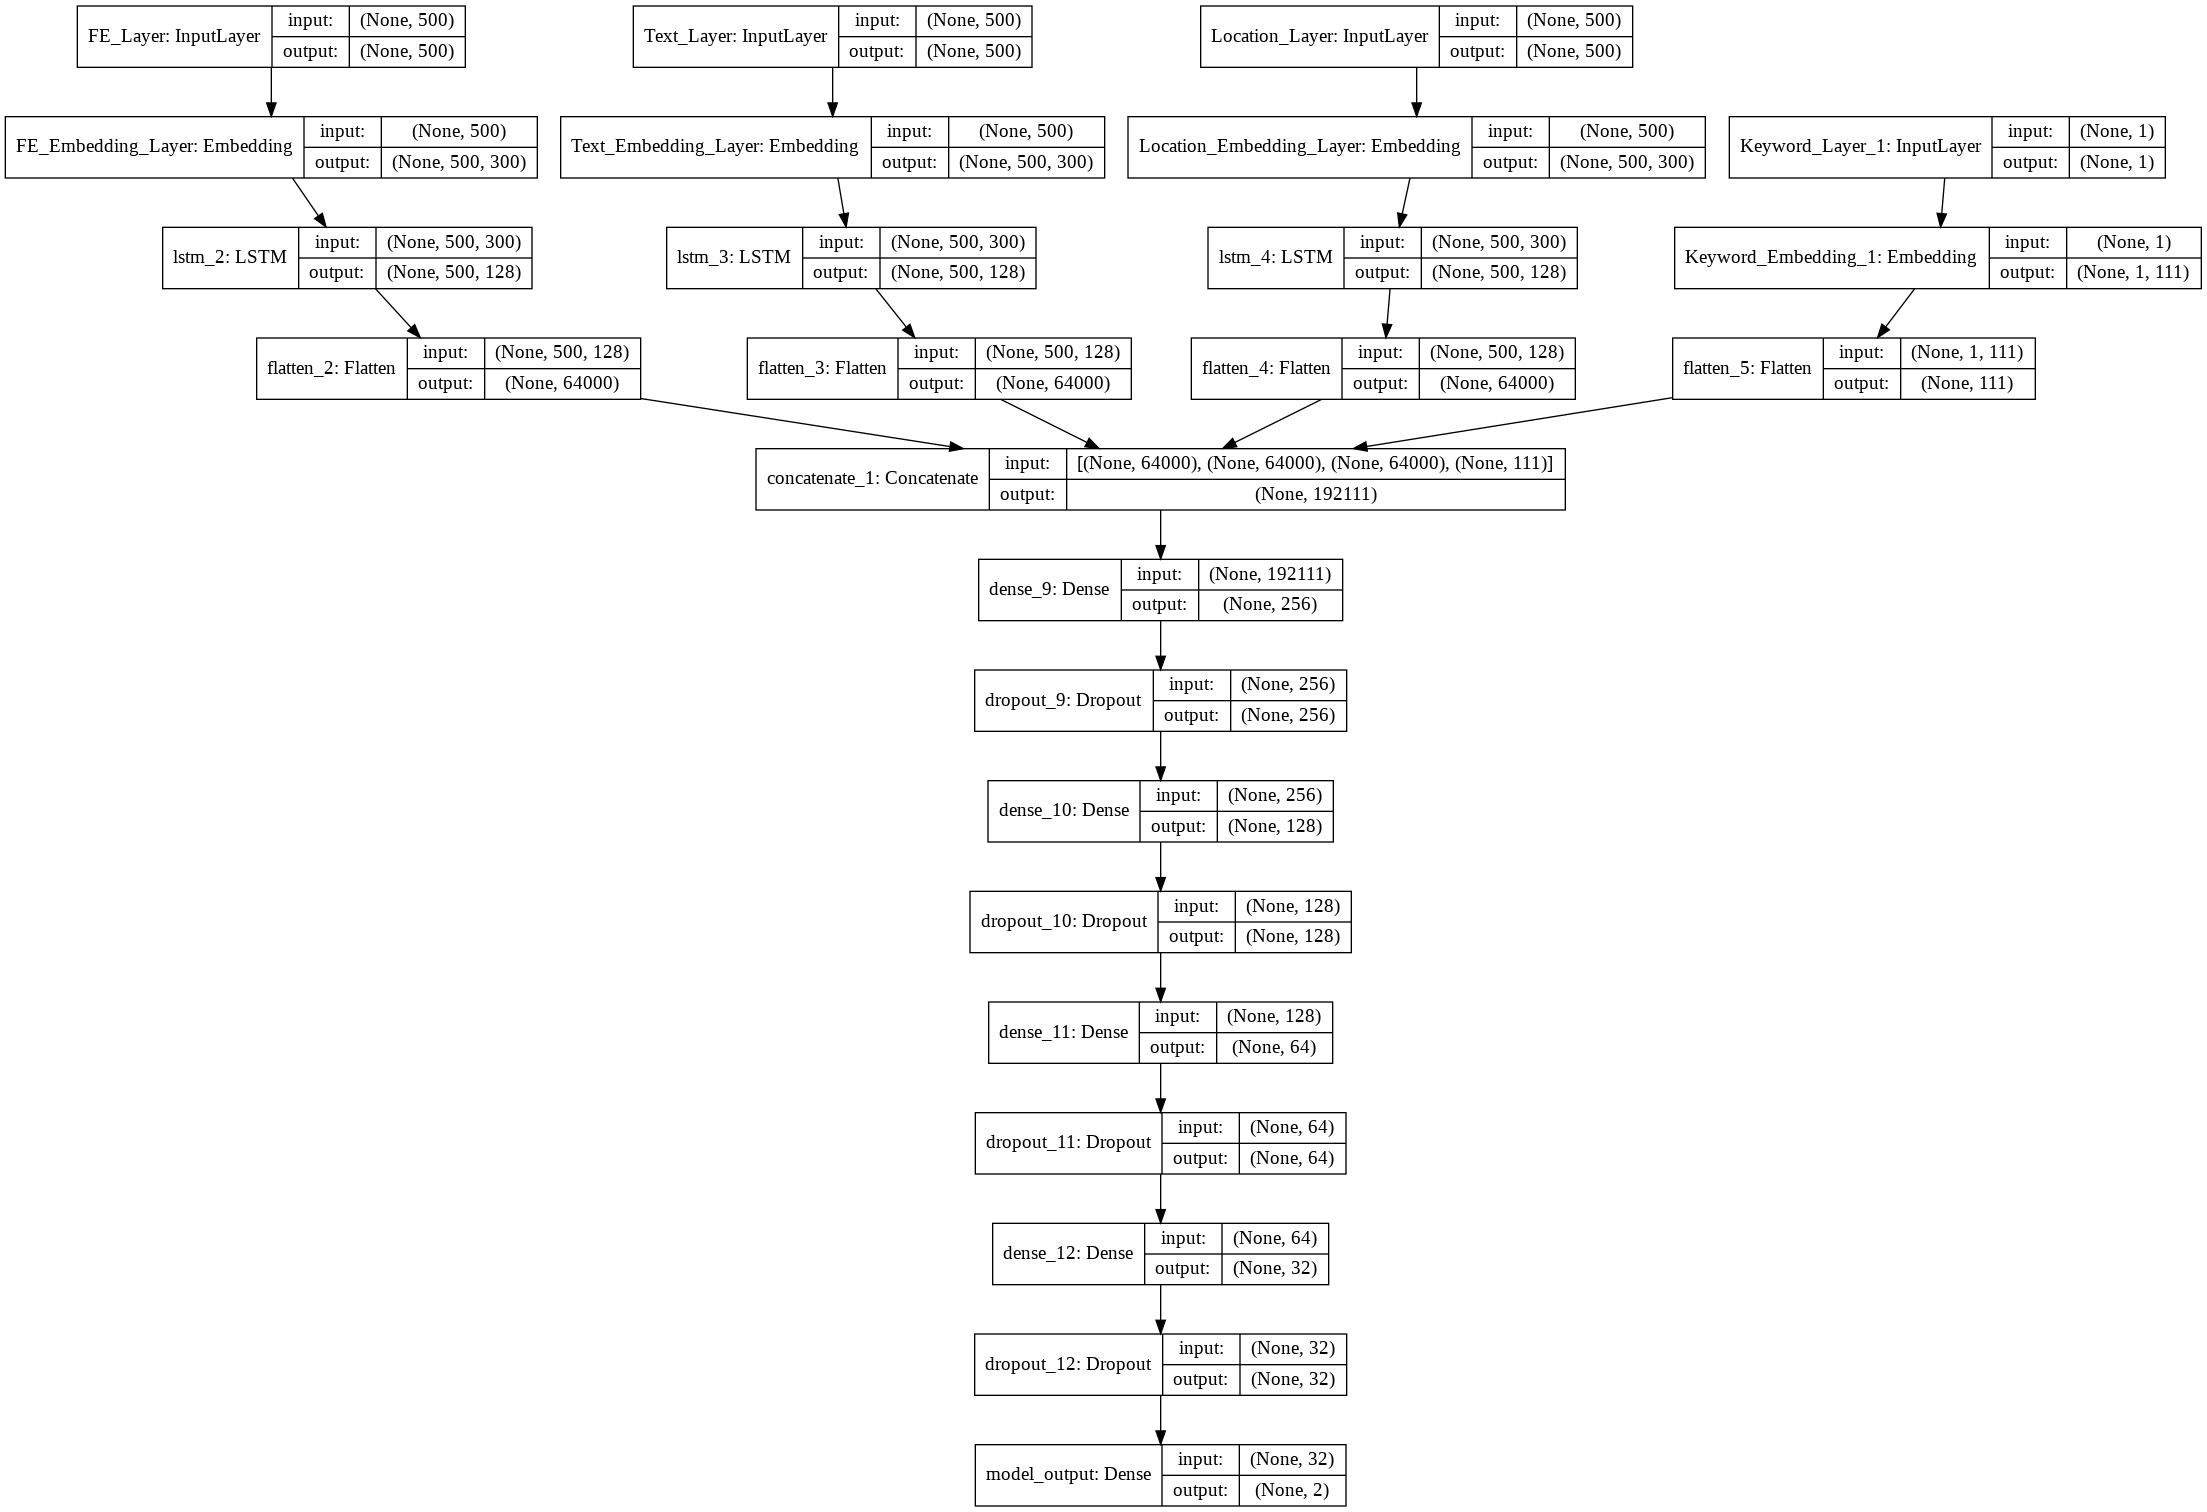

In [81]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

import pydot_ng as pydot
from keras.utils import plot_model
from IPython.display import Image

plot_model(model_1, show_shapes = True, show_layer_names = True, to_file = 'model_2.png')

Image(retina = True, filename = 'model_2.png')

# Changing dependent variable to categorical

In [0]:
from keras.utils import np_utils

y_tr = np_utils.to_categorical(dfe['target'], 2)

# Callbacks - Earlystopping, Checkpoint and Tensorboard

In [0]:
import keras
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_1 = ModelCheckpoint("model_2.h5", monitor = "val_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_1 = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_1 = TensorBoard(log_dir = "graph_2",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_1 = [checkpoint_1, earlystop_1, tensorboard_1]

# Compile data

 - Optimizer: adam
 - Loss: categorical_crossentropy
 - Metric: Accuracy

In [0]:
import warnings
warnings.filterwarnings('ignore')

from keras.optimizers import Adam, RMSprop

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training model

 - Batch size: 128
 - Epochs: 20
 - Validation split: 0.2 

In [74]:
import warnings
warnings.filterwarnings('ignore')

history_1 = model_1.fit(tr_pad, y_tr, batch_size = 128,
                        epochs = 20, validation_split = 0.2, verbose = 1,
                        callbacks = callback_1)

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 108s 18ms/step - loss: 2.9334 - acc: 0.7263 - val_loss: 1.7199 - val_acc: 0.7735

Epoch 00001: val_loss improved from inf to 1.71991, saving model to model_2.h5

Epoch 2/20
6090/6090 [==============================] - 108s 18ms/step - loss: 1.3635 - acc: 0.7780 - val_loss: 0.9907 - val_acc: 0.7925

Epoch 00002: val_loss improved from 1.71991 to 0.99066, saving model to model_2.h5
Epoch 3/20
6090/6090 [==============================] - 108s 18ms/step - loss: 1.1821 - acc: 0.7811 - val_loss: 0.7949 - val_acc: 0.7846

Epoch 00003: val_loss improved from 0.99066 to 0.79495, saving model to model_2.h5
Epoch 4/20
6090/6090 [==============================] - 109s 18ms/step - loss: 0.7132 - acc: 0.7993 - val_loss: 0.6637 - val_acc: 0.7820

Epoch 00004: val_loss improved from 0.79495 to 0.66372, saving model to model_2.h5
Epoch 5/20
6090/6090 [==============================] - 110s 18ms/step 

# Plotting train vs validation accuracy

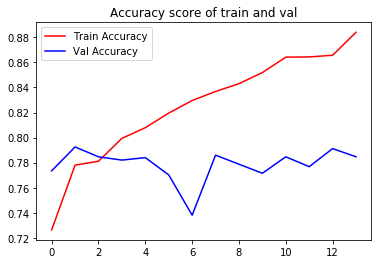

In [77]:
# Plotting train and test auc roc score
plt.plot(history_1.history['acc'], 'r')
plt.plot(history_1.history['val_acc'], 'b')
plt.title("Accuracy score of train and val")
plt.legend({'Train Accuracy': 'r', 'Val Accuracy':'b'})
plt.show()

# Plotting train vs validation loss

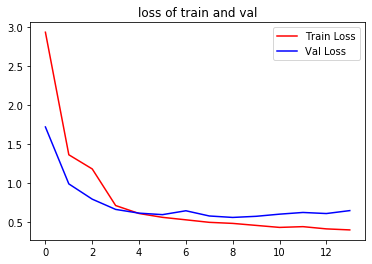

In [78]:
# Plotting train and test auc roc score
plt.plot(history_1.history['loss'], 'r')
plt.plot(history_1.history['val_loss'], 'b')
plt.title("loss of train and val")
plt.legend({'Train Loss': 'r', 'Val Loss':'b'})
plt.show()

# Test data prediction

In [0]:
pred = model_1.predict(te_pad)

# Argmax to get the class prediction
pred_class= pred.argmax(axis = 1)

# Getting a copy of submission file
sub_lstm = copy.deepcopy(submission)

# Mapping predicted class to submission
sub_lstm['target'] = pred_class

# Saving submission
sub_lstm.to_csv('LSTM.csv', index = False)

# Pretty Table

In [9]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['S.No', 'Algorithm', 'Feature Engineering', 'Test F1-Score']

a.add_row(['1', 'Naive Bayes', 'Keyword + Location + Text', 0.80163])
a.add_row(['2', 'LSTM', 'Keyword + Location + Text', 0.78834])

print('\n', a, '\n')


 +------+-------------+---------------------------+---------------+
| S.No |  Algorithm  |    Feature Engineering    | Test F1-Score |
+------+-------------+---------------------------+---------------+
|  1   | Naive Bayes | Keyword + Location + Text |    0.80163    |
|  2   |     LSTM    | Keyword + Location + Text |    0.78834    |
+------+-------------+---------------------------+---------------+ 



# Kaggle Competition Leaderboard

![title](NB_LSTM_Tweet.png)

# Conclusion

 - Applied feature engineering of combining keyword, location and text features.
 - With machine learning algorithm - Naive Bayes, achieved f1-score of 0.80163.
 - With deep learning - LSTM, achieved f1-score of 0.78834.
 - Naive Bayes outperformed when compared to LSTM.